In [1]:
from sklearn import tree
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
air_visit_df = pd.read_csv(os.path.join("air_visit_data.csv"))
air_reserve_df = pd.read_csv(os.path.join("air_reserve.csv"))
air_store_df = pd.read_csv(os.path.join("air_store_info.csv"))

In [3]:
air_visit_df.head()

,air_store_id,visit_date,visitors
0,air_ba937bf13d40fb24,2016-01-13,25
1,air_ba937bf13d40fb24,2016-01-14,32
2,air_ba937bf13d40fb24,2016-01-15,29
3,air_ba937bf13d40fb24,2016-01-16,22
4,air_ba937bf13d40fb24,2016-01-18,6


In [4]:
air_reserve_df.head()

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5


In [10]:
air_reserve_df["visit_date"] = air_reserve_df["visit_datetime"].str[:10]
air_reserve_df.head()

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors,visit_date
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1,2016-01-01
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3,2016-01-01
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6,2016-01-01
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2,2016-01-01
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5,2016-01-01


In [6]:
air_store_df.head()

,air_store_id,air_genre_name,air_area_name,latitude,longitude
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
1,air_7cc17a324ae5c7dc,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
2,air_fee8dcf4d619598e,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
3,air_a17f0778617c76e2,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
4,air_83db5aff8f50478e,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599


In [7]:
first_air_merged_df = air_store_df.merge(air_reserve_df, on = "air_store_id")
first_air_merged_df.head()

,air_store_id,air_genre_name,air_area_name,latitude,longitude,visit_datetime,reserve_datetime,reserve_visitors,visit_date
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,2016-07-01 18:00:00,2016-06-16 20:00:00,3,2016-07-01
1,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,2016-07-04 17:00:00,2016-07-04 17:00:00,2,2016-07-04
2,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,2016-07-04 20:00:00,2016-07-01 20:00:00,8,2016-07-04
3,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,2016-07-06 19:00:00,2016-07-05 20:00:00,2,2016-07-06
4,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,2016-07-06 19:00:00,2016-07-04 14:00:00,5,2016-07-06


In [28]:
air_merged_df = first_air_merged_df.merge(air_visit_df, on = ["air_store_id","visit_date"])
air_merged_df.head()

,air_store_id,air_genre_name,air_area_name,latitude,longitude,visit_datetime,reserve_datetime,reserve_visitors,visit_date,visitors
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,2016-07-01 18:00:00,2016-06-16 20:00:00,3,2016-07-01,18
1,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,2016-07-04 17:00:00,2016-07-04 17:00:00,2,2016-07-04,16
2,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,2016-07-04 20:00:00,2016-07-01 20:00:00,8,2016-07-04,16
3,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,2016-07-06 19:00:00,2016-07-05 20:00:00,2,2016-07-06,16
4,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,2016-07-06 19:00:00,2016-07-04 14:00:00,5,2016-07-06,16


In [9]:
air_merged_df["air_genre_name"].unique()

array(['Italian/French', 'Dining bar', 'Yakiniku/Korean food',
       'Cafe/Sweets', 'Izakaya', 'Okonomiyaki/Monja/Teppanyaki',
       'Bar/Cocktail', 'Japanese food', 'Creative cuisine', 'Other',
       'Western food', 'International cuisine', 'Asian', 'Karaoke/Party'],
      dtype=object)

In [15]:
genre_convert =[]
genre = air_merged_df["air_genre_name"].unique()
for i in range(len(genre)):
    genre_convert.append(i)
    

In [16]:
genre_convert


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

In [27]:
#genre_zip = zip(genre, genre_convert)
del air_merged_df

In [29]:
from sklearn.preprocessing import LabelEncoder

number = LabelEncoder()
air_merged_df["air_genre_name"] = number.fit_transform(air_merged_df["air_genre_name"].astype('str'))
air_merged_df["air_area_name"] = number.fit_transform(air_merged_df["air_area_name"].astype('str'))
air_merged_df["visit_datetime"] = number.fit_transform(air_merged_df["visit_datetime"].astype('str'))
air_merged_df["reserve_datetime"] = number.fit_transform(air_merged_df["reserve_datetime"].astype('str'))
air_merged_df["visit_date"] = number.fit_transform(air_merged_df["visit_date"].astype('str'))

air_merged_df

,air_store_id,air_genre_name,air_area_name,latitude,longitude,visit_datetime,reserve_datetime,reserve_visitors,visit_date,visitors
0,air_0f0cdeee6c9bf3d7,6,21,34.695124,135.197852,1817,2607,3,182,18
1,air_0f0cdeee6c9bf3d7,6,21,34.695124,135.197852,1841,2828,2,185,16
2,air_0f0cdeee6c9bf3d7,6,21,34.695124,135.197852,1844,2792,8,185,16
3,air_0f0cdeee6c9bf3d7,6,21,34.695124,135.197852,1854,2848,2,187,16
4,air_0f0cdeee6c9bf3d7,6,21,34.695124,135.197852,1854,2825,5,187,16
5,air_0f0cdeee6c9bf3d7,6,21,34.695124,135.197852,1854,2848,5,187,16
6,air_0f0cdeee6c9bf3d7,6,21,34.695124,135.197852,1855,2830,2,187,16
7,air_0f0cdeee6c9bf3d7,6,21,34.695124,135.197852,1874,2875,3,190,27
8,air_0f0cdeee6c9bf3d7,6,21,34.695124,135.197852,1875,2862,2,190,27
9,air_0f0cdeee6c9bf3d7,6,21,34.695124,135.197852,1876,2792,2,190,27


In [30]:
air_merged_df.head()

,air_store_id,air_genre_name,air_area_name,latitude,longitude,visit_datetime,reserve_datetime,reserve_visitors,visit_date,visitors
0,air_0f0cdeee6c9bf3d7,6,21,34.695124,135.197852,1817,2607,3,182,18
1,air_0f0cdeee6c9bf3d7,6,21,34.695124,135.197852,1841,2828,2,185,16
2,air_0f0cdeee6c9bf3d7,6,21,34.695124,135.197852,1844,2792,8,185,16
3,air_0f0cdeee6c9bf3d7,6,21,34.695124,135.197852,1854,2848,2,187,16
4,air_0f0cdeee6c9bf3d7,6,21,34.695124,135.197852,1854,2825,5,187,16


In [32]:
features = ['air_genre_name','air_area_name','latitude','longitude','visit_datetime','reserve_datetime','reserve_visitors','visit_date']
X = air_merged_df[list(features)].values
y = air_merged_df['visitors'].values

In [40]:
y = y.reshape(-1,1)
y.shape

(87181, 1)

In [35]:
X.shape

(87181, 8)

In [42]:
# Split the data into training and testing

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
### END SOLUTION

In [43]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
### END SOLUTION

In [44]:
# Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
### END SOLUTION

In [45]:
# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
### END SOLUTION

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

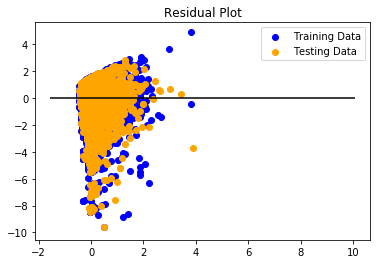

In [46]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions

### BEGIN SOLUTION
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION

In [47]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.9848334239837213, R2: 0.048651054242627285
